<a href="https://colab.research.google.com/github/CYYCcy/yama/blob/main/baseball_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:               win_prob   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     490.5
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           4.61e-58
Time:                        09:23:48   Log-Likelihood:                 154.32
No. Observations:                 100   AIC:                            -300.6
Df Residuals:                      96   BIC:                            -290.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0116      0.032  

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20778 (\N{CJK UNIFIED IDEOGRAPH-512A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21213 (\N{CJK UNIFIED IDEOGRAPH-52DD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35251 (\N{CJK UNIFIED IDEOGRAPH-89B3}) missing from font(s) DejaVu Sans.
  fig.canvas

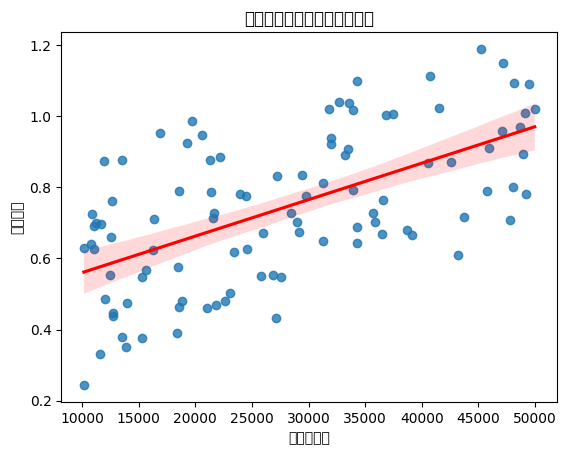

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# ダミーデータ作成
np.random.seed(42)
n = 100  # サンプル数

# 説明変数（観客動員数、チーム人気度、収容人数）
audience = np.random.randint(10000, 50000, n)  # 観客動員数
team_popularity = np.random.uniform(0, 1, n)  # チーム人気度
stadium_capacity = np.random.randint(30000, 60000, n)  # スタジアム収容人数

# 目的変数（優勝確率）
true_coefficients = [0.00001, 0.5, 0.000005]  # 仮の真の係数
noise = np.random.normal(0, 0.05, n)  # ノイズ

y = (true_coefficients[0] * audience +
     true_coefficients[1] * team_popularity +
     true_coefficients[2] * stadium_capacity + noise)  # 優勝確率（0~1）

data = pd.DataFrame({
    'audience': audience,
    'team_popularity': team_popularity,
    'stadium_capacity': stadium_capacity,
    'win_prob': y
})

# 回帰分析（統計的因果推論）
X = data[['audience', 'team_popularity', 'stadium_capacity']]
X = sm.add_constant(X)  # 切片を追加
y = data['win_prob']
model = sm.OLS(y, X).fit()

# 結果出力
print(model.summary())

# 可視化
sns.regplot(x=data['audience'], y=data['win_prob'], line_kws={'color': 'red'})
plt.xlabel("観客動員数")
plt.ylabel("優勝確率")
plt.title("観客動員数と優勝確率の関係")
plt.show()
